In [10]:
import numpy as np
import scipy.cluster.hierarchy as sch
import networkx as nx
from impl import log_diffusion_similarity, get_clustering

In [86]:
adj_matrix = np.loadtxt("competition/D1-K=2.csv" , delimiter=",")
N = adj_matrix.shape[0]

In [87]:
clustering = sch.ward(log_diffusion_similarity(adj_matrix, t = 0.54))

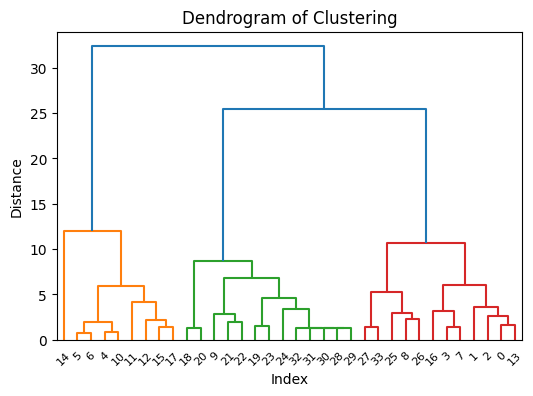

In [88]:
import matplotlib.pyplot as plt

# Plot the dendrogram
plt.figure(figsize=(6, 4))
sch.dendrogram(clustering)
plt.title("Dendrogram of Clustering")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

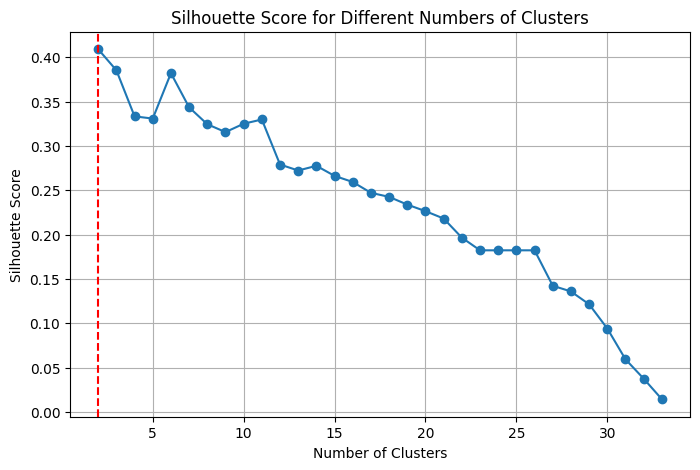

In [92]:
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

log_exp_L = log_diffusion_similarity(adj_matrix, t=0.2)
clustering = sch.ward(log_exp_L)

silhouette_scores = []
for n_clusters in range(2, N):
    cluster_labels = sch.fcluster(clustering, t=n_clusters, criterion='maxclust')
    score = silhouette_score(log_exp_L, cluster_labels, metric='euclidean')
    silhouette_scores.append(score)

kneedle = KneeLocator(range(2, N), silhouette_scores, S=1, curve="concave", direction="increasing")

plt.figure(figsize=(8, 5))
plt.plot(range(2, N), silhouette_scores, marker='o')
plt.axvline(x=kneedle.knee, color='r', linestyle='--', label=f'Optimal Clusters: {kneedle.knee}')
plt.title("Silhouette Score for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

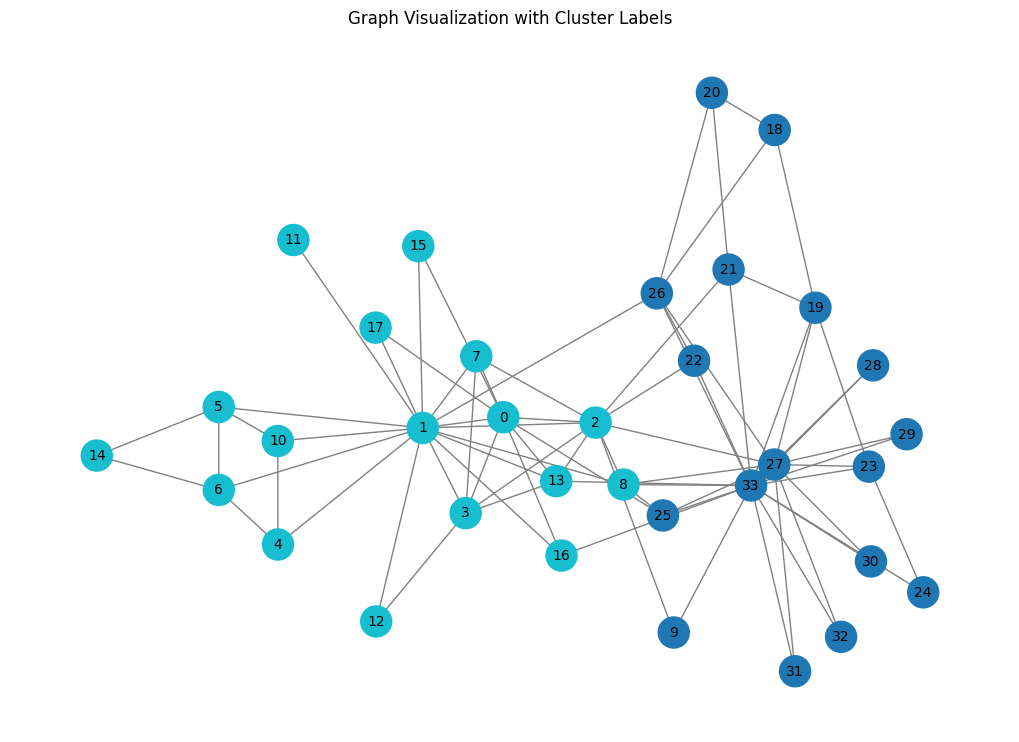

In [93]:
G = nx.from_numpy_array(adj_matrix)

# cluster_labels = sch.fcluster(clustering, t=kneedle.knee, criterion='maxclust')
cluster_labels = sch.fcluster(clustering, t=2, criterion='maxclust')
for i, label in enumerate(cluster_labels):
    G.nodes[i]['cluster'] = label

plt.figure(figsize=(10, 7))
node_colors = [G.nodes[i]['cluster'] for i in G.nodes]
nx.draw(G, with_labels=True, node_color=node_colors, cmap=plt.cm.tab10, edge_color='gray', node_size=500, font_size=10)
plt.title("Graph Visualization with Cluster Labels")
plt.show()

## Finetune the smooth param for each dataset

In [77]:
adj_matrix = np.loadtxt("competition/D1-K=2.csv" , delimiter=",")
N = adj_matrix.shape[0]

In [78]:
n_points = 100
grid = np.linspace(0.1, 0.9, n_points)


knees = []
argmaxs = []
for point in grid:
    log_exp_L = log_diffusion_similarity(adj_matrix, t=0.54)
    clustering = sch.ward(log_exp_L)
    silhouette_scores = []
    for n_clusters in range(2, N):
        cluster_labels = sch.fcluster(clustering, t=n_clusters, criterion='maxclust')
        score = silhouette_score(log_exp_L, cluster_labels, metric='euclidean')
        silhouette_scores.append(score)
    argmaxs.append(np.argmax(silhouette_scores) + 2)
    kneedle = KneeLocator(range(2, N), silhouette_scores, S=1, curve="concave", direction="increasing")
    knees.append(kneedle.knee)

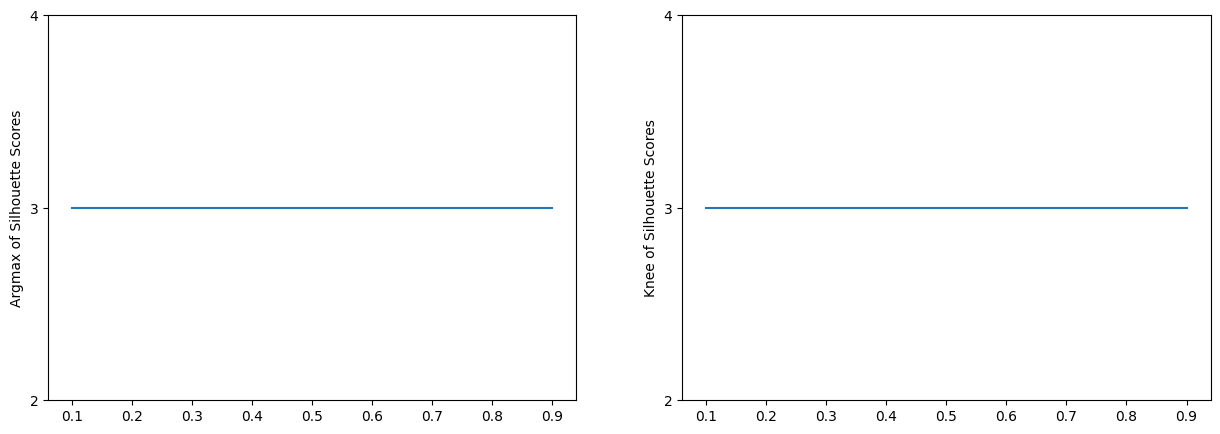

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(grid, argmaxs)
ax[0].set_ylabel("Argmax of Silhouette Scores")
ax[0].set_yticks(range(2, max(argmaxs) + 2, 1))
ax[1].plot(grid, knees)
ax[1].set_ylabel("Knee of Silhouette Scores")
ax[1].set_yticks(range(2, max(knees) + 2, 1))
plt.show()
